In [66]:
from mlos.Grpc.OptimizerMonitor import OptimizerMonitor
import grpc
# create a grpc channel and instantiate the OptimizerMonitor
channel = grpc.insecure_channel('127.0.0.1:50051')
optimizer_monitor = OptimizerMonitor(grpc_channel=channel)
optimizer_monitor

OptimizerMonitor(grpc_channel='127.0.0.1:50051')

In [67]:
optimizers = optimizer_monitor.get_existing_optimizers()
optimizers

In [68]:
optimizer = optimizers[0]
features_df, objectives_df =  optimizer.get_all_observations()


In [69]:
import pandas as pd
features, targets = optimizer.get_all_observations()
data = pd.concat([features, targets], axis=1)
data


,cache_implementation,lru_cache_config.cache_size,lfu_cache_config.cache_size,mru_cache_config.cache_size,HitRate
0,LeastRecentlyUsed,100.0,NaN,NaN,0.000000
1,MostRecentlyUsed,NaN,NaN,1765.0,0.995832
2,LeastRecentlyUsed,2755.0,NaN,NaN,0.995832
3,LeastRecentlyUsed,638.0,NaN,NaN,0.470261
4,LeastRecentlyUsed,2005.0,NaN,NaN,0.995832
...,...,...,...,...,...
95,MostRecentlyUsed,NaN,NaN,3414.0,0.995832
96,MostRecentlyUsed,NaN,NaN,3351.0,0.995832
97,LeastFrequentlyUsed,NaN,647.0,NaN,0.664700
98,LeastRecentlyUsed,1465.0,NaN,NaN,0.759958


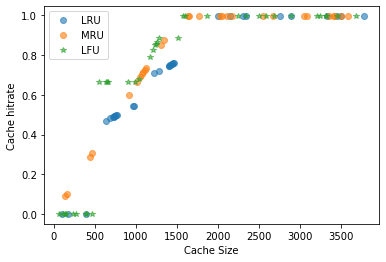

In [70]:
lfu_data, lru_data, mru_data = data.groupby('cache_implementation')
#print(list(data.groupby('cache_implementation')))

import matplotlib.pyplot as plt
line_lru = lru_data[1].plot(x='lru_cache_config.cache_size', y='HitRate', label='LRU', marker='o', linestyle='none', alpha=.6)
mru_data[1].plot(x='mru_cache_config.cache_size', y='HitRate', label='MRU', marker='o', linestyle='none', alpha=.6, ax=plt.gca())
lfu_data[1].plot(x='lfu_cache_config.cache_size', y='HitRate', label='LFU', marker='*', linestyle='none', alpha=.6, ax=plt.gca())
plt.ylabel("Cache hitrate")
plt.xlabel("Cache Size")
plt.legend()